In [1]:
import pandas as pd
import numpy as np
from WindPy import w
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

# 申万二级行业指数

In [3]:
codes = '801011.SI,801012.SI,801013.SI,801014.SI,801015.SI,801016.SI,801017.SI,801018.SI,801021.SI,801022.SI,801023.SI,801024.SI,801032.SI,801033.SI,801034.SI,801035.SI,801036.SI,801037.SI,801041.SI,801051.SI,801053.SI,801054.SI,801055.SI,801072.SI,801073.SI,801074.SI,801075.SI,801076.SI,801081.SI,801082.SI,801083.SI,801084.SI,801085.SI,801092.SI,801093.SI,801094.SI,801101.SI,801102.SI,801111.SI,801112.SI,801123.SI,801124.SI,801131.SI,801132.SI,801141.SI,801142.SI,801143.SI,801144.SI,801151.SI,801152.SI,801153.SI,801154.SI,801155.SI,801156.SI,801161.SI,801162.SI,801163.SI,801164.SI,801171.SI,801172.SI,801173.SI,801174.SI,801175.SI,801176.SI,801177.SI,801178.SI,801181.SI,801182.SI,801191.SI,801192.SI,801193.SI,801194.SI,801202.SI,801203.SI,801204.SI,801205.SI,801211.SI,801212.SI,801213.SI,801214.SI,801215.SI,801222.SI,801223.SI,801231.SI,801711.SI,801712.SI,801713.SI,801721.SI,801722.SI,801723.SI,801724.SI,801725.SI,801731.SI,801732.SI,801733.SI,801734.SI,801741.SI,801742.SI,801743.SI,801744.SI,801751.SI,801752.SI,801761.SI,801881.SI'

In [4]:
start_date, end_date = '2000-01-01', '2020-02-19'

In [5]:
data = w.wsd(codes, 'close', start_date, end_date, 'Period=M')

In [6]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [7]:
ret = df.pct_change()

In [8]:
ret.head()

,801011.SI,801012.SI,801013.SI,801014.SI,801015.SI,801016.SI,801017.SI,801018.SI,801021.SI,801022.SI,...,801733.SI,801734.SI,801741.SI,801742.SI,801743.SI,801744.SI,801751.SI,801752.SI,801761.SI,801881.SI
2000-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,-0.022631,0.151000,0.286219,0.066006,0.086743,0.278175,0.078687,0.073794,0.074134,0.127963,...,0.01307,0.024559,NaN,-0.056855,0.159208,NaN,NaN,0.610795,0.140533,0.173959
2000-03-31,0.045478,0.076197,-0.005774,0.254775,0.109177,0.023632,0.162017,-0.001428,0.189984,0.110780,...,0.05779,0.203325,NaN,0.065594,0.010217,NaN,NaN,-0.195254,0.072201,0.170035
2000-04-28,0.008447,-0.041748,0.126473,0.093501,0.024810,-0.076264,0.065266,0.050708,-0.132613,0.025718,...,-0.06112,-0.018670,NaN,-0.007822,-0.001125,NaN,NaN,0.025713,-0.039412,0.086241
2000-05-31,0.029383,0.055127,-0.052890,0.133190,0.016142,0.042937,0.126607,0.027543,0.224453,0.462195,...,0.00121,-0.005924,NaN,-0.042424,0.003374,NaN,NaN,-0.065417,-0.037551,-0.005195


In [29]:
mom = ret.rolling(24).mean()

In [30]:
trend = mom.copy()

In [31]:
trend[trend > 0] = 1
up = trend[trend == 1].sum(axis=1)

In [32]:
trend[trend < 0] = -1
down = -trend[trend == -1].sum(axis=1)

In [33]:
prob = down / (up + down)

In [34]:
data = w.wsd('881001.WI', 'close', start_date, end_date, 'Period=M')

In [35]:
index = pd.Series(np.array(data.Data[0]), index=data.Times)

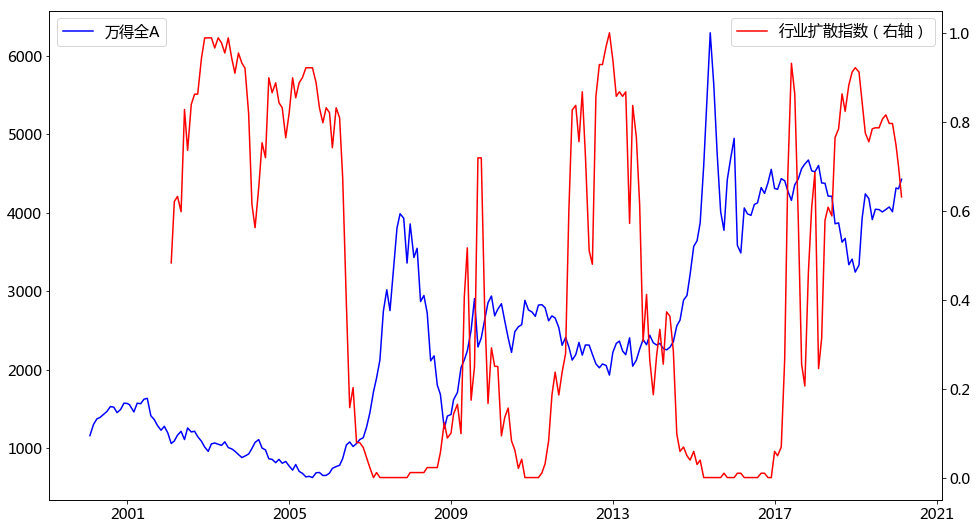

In [36]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(index, color='blue', label='万得全A')
axx = ax.twinx()
axx.plot(prob, color='red', label='行业扩散指数（右轴）')
ax.legend(fontsize=15, loc='upper left')
axx.legend(fontsize=15, loc='upper right')

ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)